# Histogramas: Decodificando Datos

En la era de la información, donde grandes volúmenes de datos son la norma, la habilidad para visualizar y analizar estos datos se convierte en una habilidad indispensable. Los histogramas emergen como una herramienta estadística crucial, no sólo para la visualización efectiva de datos, sino también para la interpretación y el análisis de sus distribuciones. Este artículo examina cómo la estructuración de datos en bins dentro de un histograma puede superar el reto de visualizar puntos de datos superpuestos, proporcionando así una ventana clara hacia patrones y tendencias ocultas.

## Datos Superpuestos

Los histogramas son herramientas estadísticas fundamentales para la visualización y el análisis de distribuciones de datos. A menudo, en el estudio de una variable, se mide un gran número de individuos, resultando en una cantidad de datos donde algunos valores pueden solaparse o incluso quedar ocultos.

La superposición de datos en la visualización es un fenómeno que se produce cuando múltiples puntos de datos se representan en un mismo espacio visual, resultando en que unos puntos se monten sobre otros. Este efecto puede ser particularmente problemático en conjuntos de datos grandes, donde la frecuencia de valores similares es alta.

La superposición puede distorsionar la interpretación de la información al ocultar la verdadera cantidad de observaciones en un área específica del gráfico. En la práctica, esto significa que, aunque visualmente puede parecer que hay una baja cantidad de datos en ciertos rangos de valor, en realidad puede haber una concentración significativa de observaciones que no se perciben a simple vista. Para resolver este problema, se utiliza el histograma.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

n = 100
id = range(1, n + 1)
# https://www.eltiempo.com/archivo/documento/CMS-13128617
height = np.random.normal(172, 8, n)
# Body mass index (BMI)
# https://en.wikipedia.org/wiki/Body_mass_index
# weight = BMI * height^2
bmi = 26 + np.random.normal(0, 2.5, n)
weight = bmi * ((height/100) ** 2)
commute_time = np.random.uniform(15, 60, n)

data = pd.DataFrame({'ID': id, 'Height': height, 'Weight': weight, 'BMI': bmi})
data.sort_values(by=['Height'],inplace=True,ignore_index=True)

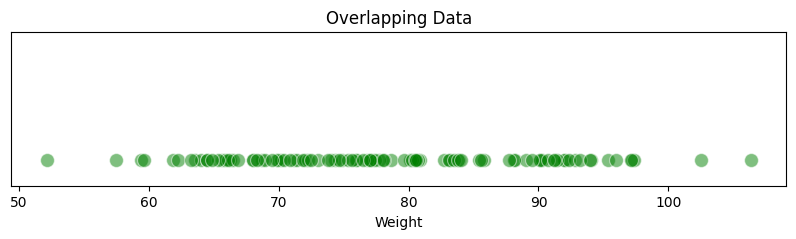

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.scatterplot(x=data['Weight'], y=np.zeros(n), s=100, color="green", alpha=0.5, marker='o', legend=False)
plt.yticks([])
plt.xlabel("Weight")
plt.title("Overlapping Data")
plt.ylim(-1, 5)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

## Agrupando Datos

Un histograma se crea dividiendo el rango de valores posibles en intervalos, conocidos como 'bins', y contabilizando cuántas mediciones caen en cada uno de ellos. La altura de cada pila dentro de un bin refleja el número de mediciones que corresponden a ese intervalo. Esta representación facilita la identificación de la frecuencia con la que ocurren ciertos rangos de valores en el conjunto de datos.

Al dividir el rango de valores posibles en segmentos discretos, y apilar las mediciones correspondientes, los histogramas revelan patrones que son fundamentales para el análisis estadístico. Estos patrones pueden indicar tendencias, picos, y anomalías en los datos. Por ejemplo, un pico en un intervalo puede señalar un rango de peso común en una población.

Además, la altura de las pilas en cada bin no solo muestra cuántas mediciones caen dentro de un rango específico, sino que también puede indicar la centralización o dispersión de los datos. Un histograma con pilas de altura similar sugiere una distribución uniforme, mientras que las pilas de diferentes alturas indican variabilidad.

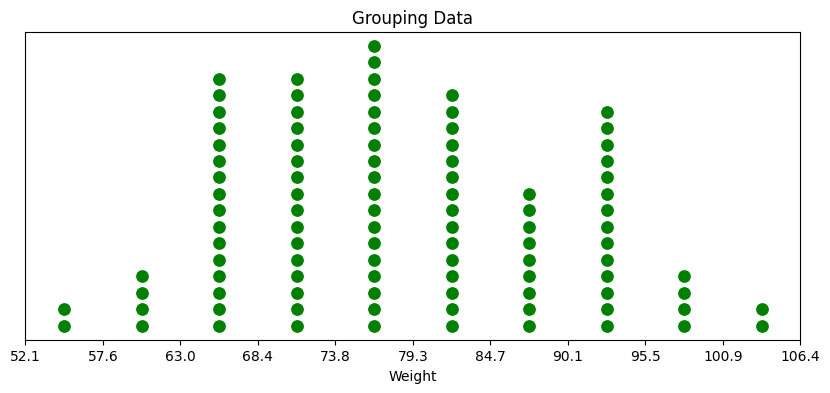

In [3]:
bin_count = 10
counts, bin_edges = np.histogram(data['Weight'], bins=bin_count)
hist_data = pd.DataFrame()

for i in range(bin_count):
    bin_center = (bin_edges[i] + bin_edges[i + 1]) / 2
    bin_data = pd.DataFrame({'x': [bin_center] * counts[i], 'y': range(counts[i])})
    hist_data = pd.concat([hist_data, bin_data], ignore_index=True)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=hist_data['x'], y=hist_data['y'], s=100, color="green", marker='o', legend=False)

plt.xlabel("Weight")
plt.title("Grouping Data")
plt.xticks(ticks=bin_edges, labels=np.round(bin_edges, 1))
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

El análisis detallado de las visualizaciones nos muestra cómo un gráfico de puntos agrupados, donde cada punto representa una medición individual, puede transformarse en un histograma de barras para una interpretación más eficiente. En el histograma de barras, los 'bins' representan rangos de valores, y las alturas de las barras reflejan la cantidad de mediciones en esos rangos. Esta transición de puntos individuales a barras agrupadas simplifica la visualización y mejora la interpretación de la frecuencia y la distribución de los datos, permitiendo a los analistas capturar rápidamente la esencia de la información contenida en el conjunto de datos.

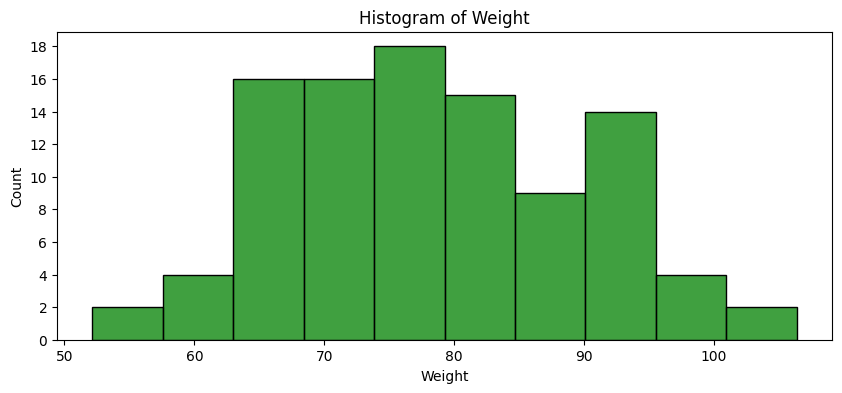

In [4]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight")
plt.show()

## Distribuciones y Predicciones

Los histogramas ofrecen más que una simple instantánea de datos pasados; son predictores potenciales de eventos futuros. Al observar la altura de las barras, los analistas pueden cuantificar la probabilidad de ocurrencia de un evento dentro de un rango de valores. Un rango con una barra alta significa una mayor probabilidad de que los eventos futuros caigan en ese rango, lo que puede ser crucial para la toma de decisiones en campos como la calidad del control de procesos o la gestión de riesgos.

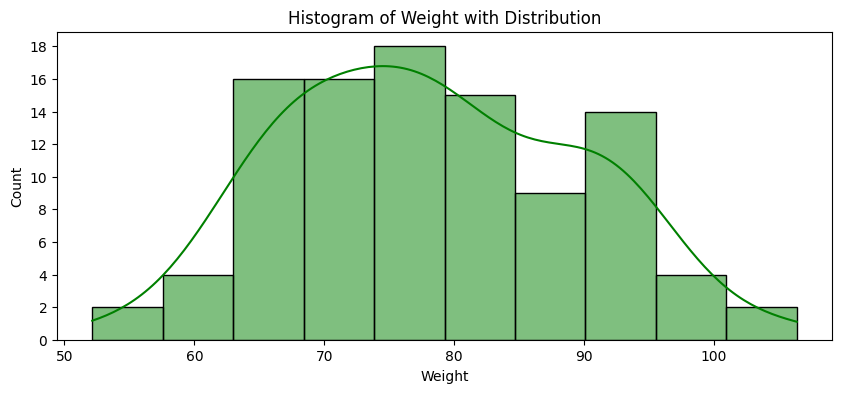

In [5]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count, color="green", kde=True)
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Distribution")
plt.show()

La forma del histograma brinda pistas sobre la distribución estadística subyacente. Un perfil en forma de campana simétrica sugiere que los datos pueden seguir una distribución normal, que es común en fenómenos naturales y sociales. Por otro lado, una forma sesgada hacia un extremo podría implicar una distribución exponencial, que a menudo se encuentra en procesos que involucran decaimiento o crecimiento, como la desintegración radiactiva o la adopción de nuevas tecnologías.

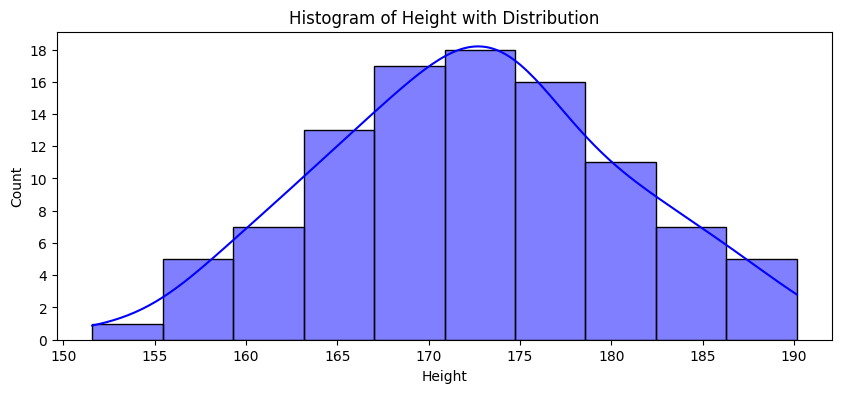

In [6]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Height'], bins=bin_count, color="blue", kde=True)
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Histogram of Height with Distribution")
plt.show()

La predicción de probabilidades a partir de histogramas no es infalible; se basa en la suposición de que las condiciones existentes persistirán en el futuro. Sin embargo, esta herramienta estadística proporciona una base sólida para inferir tendencias y patrones que son esenciales para comprender tanto la actualidad como el potencial futuro de los datos observados.

## Calibrando Bins en Histogramas

La selección del ancho de los 'bins' en un histograma es una parte integral del proceso de visualización de datos que tiene un impacto significativo en la interpretación de los resultados estadísticos. Un 'bin' demasiado estrecho puede resultar en un gráfico sobre-fragmentado que hace difícil discernir cualquier patrón significativo, similar a mirar cada punto de dato de manera aislada.

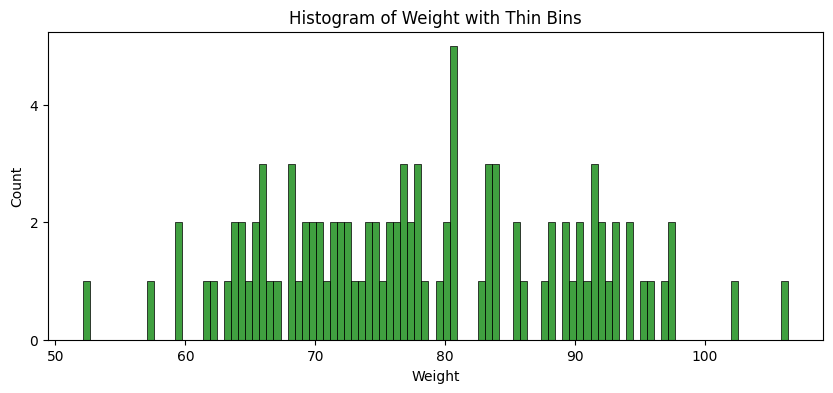

In [7]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=100, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Thin Bins")
plt.show()

Por otro lado, 'bins' excesivamente anchos pueden amalgamar datos críticos, borrando diferencias sutiles y posiblemente relevantes entre las mediciones.

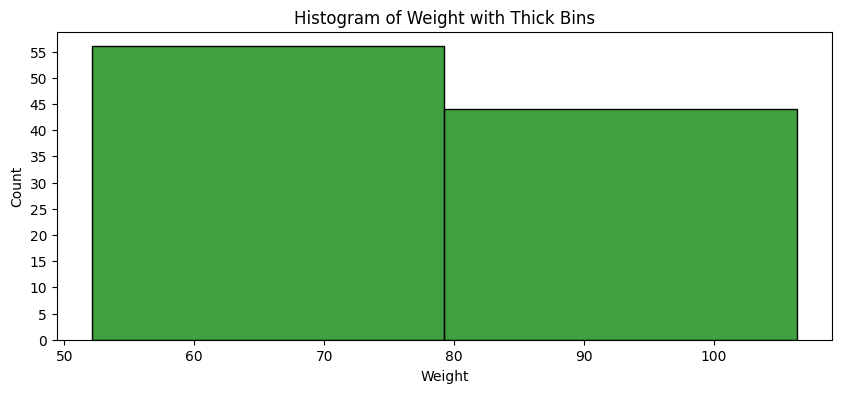

In [8]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=2, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 5))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Thick Bins")
plt.show()

Este acto de equilibrio entre demasiado detalle y una excesiva generalización requiere una cuidadosa consideración del contexto de los datos y del propósito del análisis. Los estadísticos a menudo prueban diferentes anchos de 'bins' y comparan visualmente los histogramas resultantes para evaluar cuál presenta la mejor interpretación de la distribución de datos.

## Cálculo Cuantitativo de Bins

En algunos casos, se pueden aplicar métodos cuantitativos para determinar el ancho óptimo de 'bins', basados en medidas como la amplitud de los datos y el tamaño de la muestra.

Se pueden aplicar métodos cuantitativos como la regla de Sturges, que sugiere que el número óptimo de 'bins' puede calcularse como:

$$ k = 1 + \log_{2}(n) $$

donde $ n $ es el tamaño de la muestra.

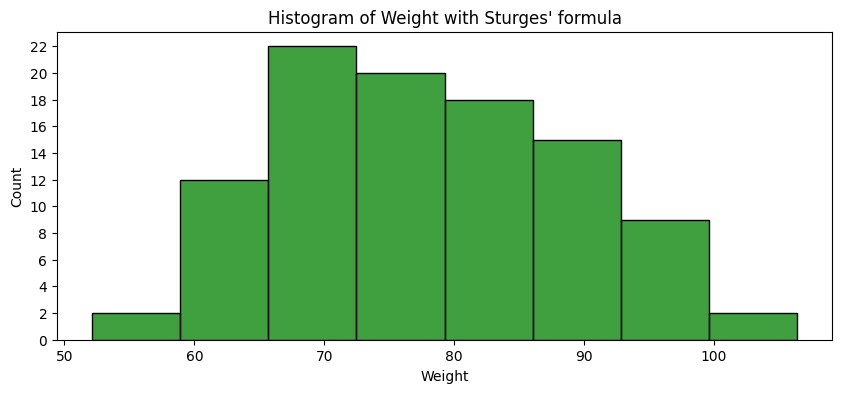

In [9]:
bin_count_sturges = int((1 + np.log2(n)).round())
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count_sturges, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Sturges' formula")
plt.show()

La regla de la raíz cuadrada propone un número de 'bins' equivalente a la raíz cuadrada del tamaño de la muestra, simplificando el cálculo a:

$$ k = \sqrt{n} $$

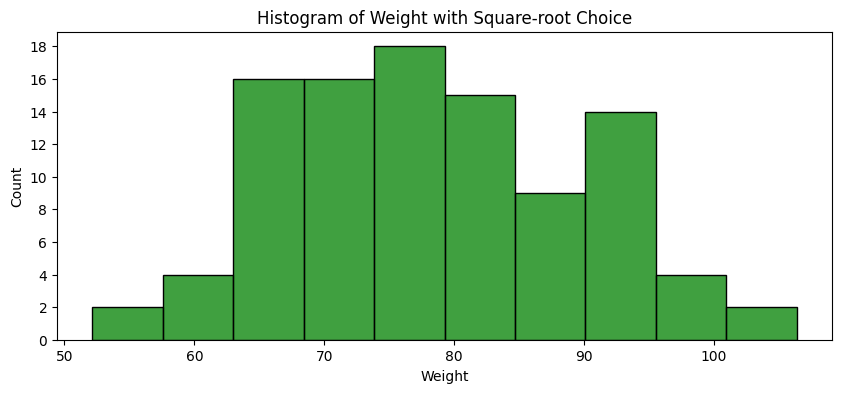

In [10]:
bin_count_sturges = int((np.sqrt(n)).round())
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count_sturges, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Square-root Choice")
plt.show()

La regla de Freedman-Diaconis utiliza el rango intercuartílico $IQR$ para determinar el ancho del 'bin' $ h $ de una manera que minimiza la diferencia en la distribución de la muestra y la representación del histograma:

$$ h = 2 \times \frac{\text{IQR}}{n^{1/3}} $$

7.862429209262235


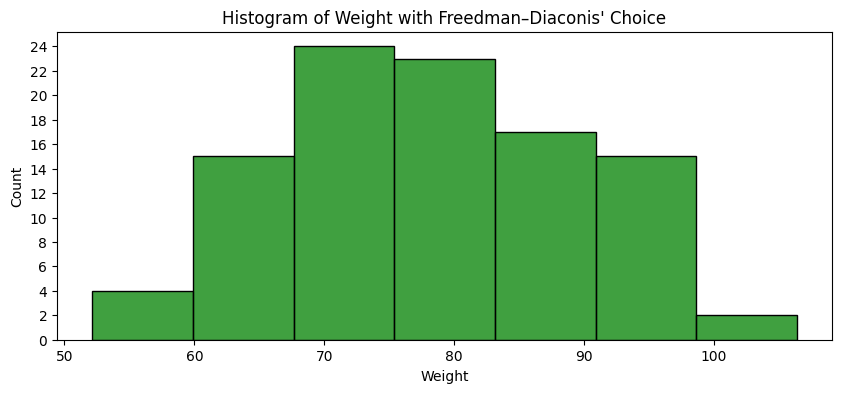

In [11]:
Q1 = np.percentile(data['Weight'], 25, method= 'midpoint')
Q3 = np.percentile(data['Weight'], 75, method= 'midpoint')
IQR = Q3 - Q1
h_reedman_diaconis = 2 * IQR /(n ** (1/3))
print(h_reedman_diaconis)
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], binwidth=h_reedman_diaconis, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Freedman–Diaconis' Choice")
plt.show()

Por último, la regla de Scott ajusta el ancho del 'bin' para minimizar la distorsión en la representación de la distribución normal y se calcula como:

$$ h = 3.49 \times \sigma \times n^{-1/3} $$

donde $ \sigma $ es la desviación estándar de los datos.

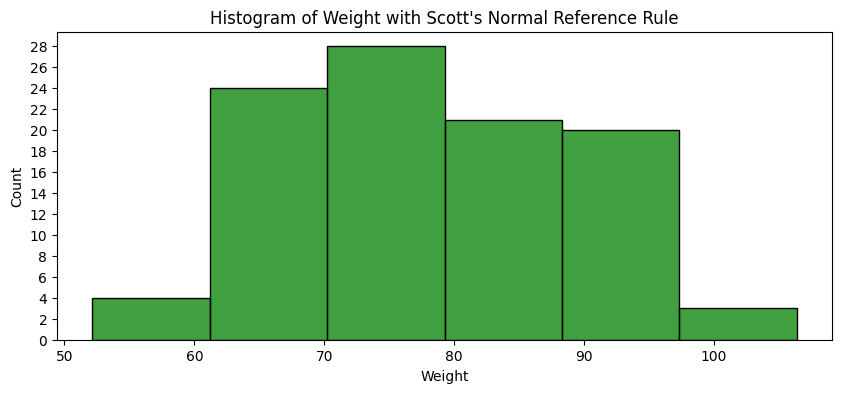

In [12]:
h_scott = 3.49 * data['Weight'].std() /(n ** (1/3))
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], binwidth=h_scott, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Scott's Normal Reference Rule")
plt.show()

Estas fórmulas matemáticas proporcionan una base estructurada para definir el ancho de 'bins' y pueden ser particularmente útiles cuando se manejan grandes conjuntos de datos o cuando se requiere un análisis estadístico riguroso. Aplicar estos métodos ayuda a evitar la subjetividad y asegura que el histograma refleje las propiedades intrínsecas de los datos.

## Conclusión

Los histogramas, con su capacidad para transformar datos crudos en visualizaciones comprensibles, juegan un papel crucial en el análisis de datos moderno. Al agrupar eficientemente los datos y revelar sus distribuciones subyacentes, estos gráficos no solo mejoran la interpretación de los conjuntos de datos complejos, sino que también allanan el camino para modelos predictivos más precisos y decisiones informadas. Este análisis demuestra cómo una herramienta aparentemente simple puede tener un impacto profundo en el campo de la ciencia de datos y el aprendizaje automático.